In [1]:
import librosa
import librosa.display
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Dataset Info
dataset_info_csv = './UrbanSound8K.csv'
dataset_info = read_csv(dataset_info_csv, header=0)
print(dataset_info)

         slice_file_name    fsID       start         end  duration  salience  \
0       100032-3-0-0.wav  100032    0.000000    0.317551  0.317551         1   
1     100263-2-0-117.wav  100263   58.500000   62.500000  4.000000         1   
2     100263-2-0-121.wav  100263   60.500000   64.500000  4.000000         1   
3     100263-2-0-126.wav  100263   63.000000   67.000000  4.000000         1   
4     100263-2-0-137.wav  100263   68.500000   72.500000  4.000000         1   
...                  ...     ...         ...         ...       ...       ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205  4.000000         2   
8728     99812-1-3-0.wav   99812  181.142431  183.284976  2.142545         2   
8729     99812-1-4-0.wav   99812  242.691902  246.197885  3.505983         2   
8730     99812-1-5-0.wav   99812  253.209850  255.741948  2.532098         2   
8731     99812-1-6-0.wav   99812  332.289233  334.821332  2.532099         2   

      fold  classID             class  

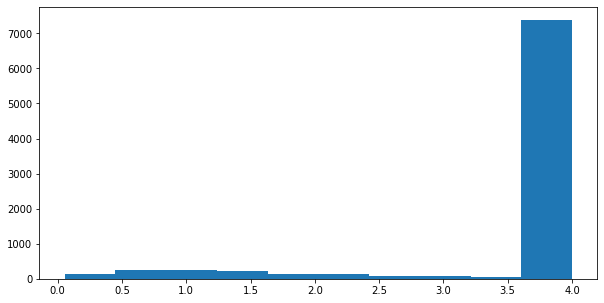

<Figure size 432x288 with 0 Axes>

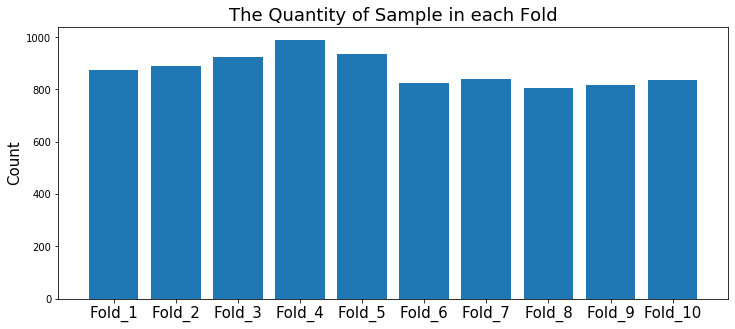

<Figure size 432x288 with 0 Axes>

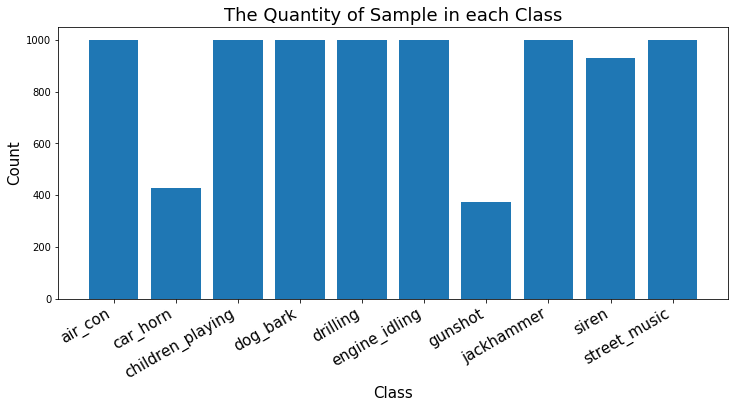

<Figure size 432x288 with 0 Axes>

In [4]:
plt.figure(figsize=(10,5))
plt.hist(dataset_info["duration"])
plt.show()
plt.clf()

fold_label = ["Fold_1", "Fold_2", "Fold_3", "Fold_4", "Fold_5", "Fold_6", "Fold_7","Fold_8" ,"Fold_9", "Fold_10"]
unique, counts = np.unique(dataset_info["fold"], return_counts=True)
plt.figure(figsize=(12,5))
plt.bar(fold_label,counts)
plt.xticks(fontsize= 15)
plt.ylabel('Count', fontsize=15)
plt.title("The Quantity of Sample in each Fold", fontsize=18)
plt.show()
plt.clf()

class_label = ["air_con", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gunshot", "jackhammer", "siren", "street_music"]
unique, counts = np.unique(dataset_info["classID"], return_counts=True)
plt.figure(figsize=(12,5))
plt.bar(class_label,counts)
plt.xticks(fontsize= 15)
plt.xticks(rotation=30, ha = 'right')
plt.xlabel('Class', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title("The Quantity of Sample in each Class", fontsize=18)
plt.show()
plt.clf()

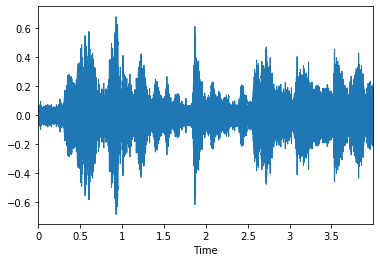

<Figure size 432x288 with 0 Axes>

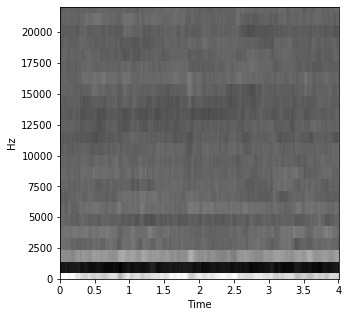

<Figure size 432x288 with 0 Axes>

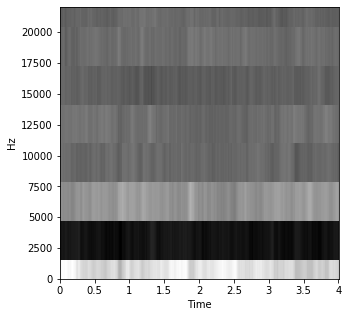

<Figure size 432x288 with 0 Axes>

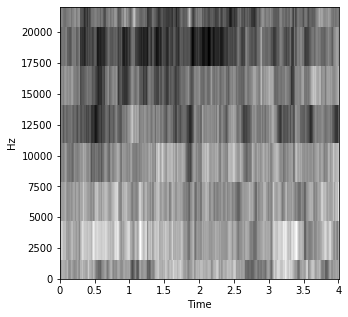

<Figure size 432x288 with 0 Axes>

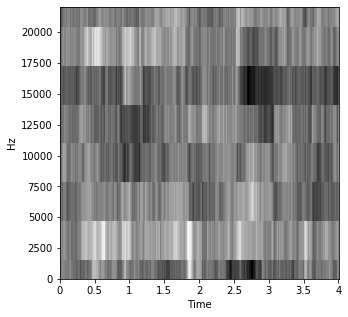

<Figure size 432x288 with 0 Axes>

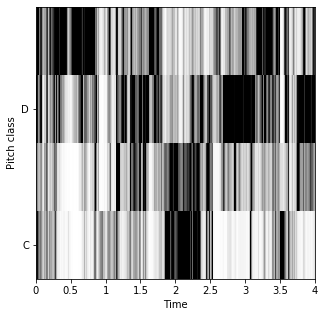

<Figure size 432x288 with 0 Axes>

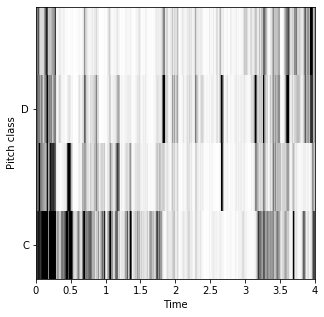

<Figure size 432x288 with 0 Axes>

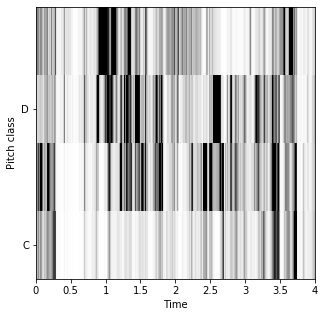

(12, 345)


<Figure size 432x288 with 0 Axes>

In [8]:
# Spectrogram of a sound track sample
audio_file = 'urbansound8k/fold1/97317-2-0-28.wav'
series , sample_rate = librosa.load(audio_file, sr=44100)

# Generate Wave form
librosa.display.waveplot(series, sr=sample_rate)
plt.show()
plt.clf()

# Generate MFCC Spectrogram
MFCC= librosa.feature.mfcc(series, sr=sample_rate, n_mfcc=24)
plt.figure(figsize=(5,5))
librosa.display.specshow(MFCC,sr=sample_rate, x_axis='time', y_axis='hz', cmap='gray_r')
plt.show()
plt.clf()
plt.figure(figsize=(5,5))
librosa.display.specshow(MFCC[:8,:],sr=sample_rate, x_axis='time', y_axis='hz', cmap='gray_r')
plt.show()
plt.clf()
plt.figure(figsize=(5,5))
librosa.display.specshow(MFCC[8:16,:],sr=sample_rate, x_axis='time', y_axis='hz', cmap='gray_r')
plt.show()
plt.clf()
plt.figure(figsize=(5,5))
librosa.display.specshow(MFCC[16:,:],sr=sample_rate, x_axis='time', y_axis='hz', cmap='gray_r')
plt.show()
plt.clf()

# Generate STFT Spectrogram
STFT = librosa.feature.chroma_stft(series, sr=sample_rate)
plt.figure(figsize=(5,5))
librosa.display.specshow(STFT[:4,:], sr=sample_rate, x_axis='time', y_axis='chroma', cmap='gray_r')
plt.show()
plt.clf()
STFT = librosa.feature.chroma_stft(series, sr=sample_rate)
plt.figure(figsize=(5,5))
librosa.display.specshow(STFT[4:8,:], sr=sample_rate, x_axis='time', y_axis='chroma', cmap='gray_r')
plt.show()
plt.clf()
STFT = librosa.feature.chroma_stft(series, sr=sample_rate)
plt.figure(figsize=(5,5))
librosa.display.specshow(STFT[8:,:], sr=sample_rate, x_axis='time', y_axis='chroma', cmap='gray_r')
plt.show()
plt.clf()

print(STFT.shape)



In [4]:
# Generate Graphical data of each audio data
waveForm_dir = "./WaveForm/"
Colour_MFCC_Large_dir = "./Colour_Large_MFCC/"
Colour_MFCC_Small_dir = "./Colour_Small_MFCC/"
Colour_STFT_Large_dir = "./Colour_Large_STFT/"
Colour_STFT_Small_dir = "./Colour_Small_STFT/"

if not os.path.exists(waveForm_dir):
    os.makedirs(waveForm_dir)
    for i in range(1,11):
        os.makedirs(waveForm_dir+"/fold"+str(i))
        
if not os.path.exists(Colour_MFCC_Large_dir):
    os.makedirs(Colour_MFCC_Large_dir)
    for i in range(1,11):
        os.makedirs(Colour_MFCC_Large_dir+"/fold"+str(i))
        
if not os.path.exists(Colour_MFCC_Small_dir):
    os.makedirs(Colour_MFCC_Small_dir)
    for i in range(1,11):
        os.makedirs(Colour_MFCC_Small_dir+"/fold"+str(i))

if not os.path.exists(Colour_STFT_Large_dir):
    os.makedirs(Colour_STFT_Large_dir)
    for i in range(1,11):
        os.makedirs(Colour_STFT_Large_dir+"/fold"+str(i))

if not os.path.exists(Colour_STFT_Small_dir):
    os.makedirs(Colour_STFT_Small_dir)
    for i in range(1,11):
        os.makedirs(Colour_STFT_Small_dir+"/fold"+str(i))

for file in dataset_info.values:
    audio_file = "urbansound8k/" + "fold" + str(file[6]) + "/" + file[0]
    series , sample_rate = librosa.load(audio_file)
    
    # Generate Wave form
    plt.figure(figsize=(5,5))
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    librosa.display.waveplot(series, sr=sample_rate)
    plt.axis('off')
    plt.savefig(waveForm_dir+"fold"+str(file[6])+"/"+file[0].replace(".wav", ".png"), bbox_inches = 'tight',
    pad_inches = 0)
    plt.clf()

    # Generate Large MFCC Colour Spectrogram
    MFCC= librosa.feature.mfcc(series, sr=sample_rate, n_mfcc=40)
    plt.figure(figsize=(5,5))
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    librosa.display.specshow(MFCC, sr=sample_rate, x_axis='time', y_axis='chroma')
    plt.axis('off')
    plt.savefig(Colour_MFCC_Large_dir+ "fold" + str(file[6]) + "/" +file[0].replace(".wav", ".png"), bbox_inches = 'tight',
    pad_inches = 0)
    plt.clf()
    
    # Generate Small MFCC Colour Spectrogram
    MFCC= librosa.feature.mfcc(series, sr=sample_rate, n_mfcc=40)
    plt.figure(figsize=(2,2))
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    librosa.display.specshow(MFCC, sr=sample_rate, x_axis='time', y_axis='chroma')
    plt.axis('off')
    plt.savefig(Colour_MFCC_Small_dir+ "fold" + str(file[6]) + "/" +file[0].replace(".wav", ".png"), bbox_inches = 'tight',
    pad_inches = 0)
    plt.clf()
    
    # Generate Large STFT Spectrogram
    STFT = librosa.feature.chroma_stft(series, sr=sample_rate)
    plt.figure(figsize=(5,5))
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    librosa.display.specshow(STFT, sr=sample_rate, x_axis='time', y_axis='chroma')
    plt.axis('off')
    plt.savefig(Colour_STFT_Large_dir+ "fold" + str(file[6]) + "/" +file[0].replace(".wav", ".png"), bbox_inches = 'tight',
    pad_inches = 0)
    plt.clf()

    # Generate Small STFT Spectrogram
    STFT = librosa.feature.chroma_stft(series, sr=sample_rate)
    plt.figure(figsize=(2,2))
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    librosa.display.specshow(STFT, sr=sample_rate, x_axis='time', y_axis='chroma')
    plt.axis('off')
    plt.savefig(Colour_STFT_Small_dir+ "fold" + str(file[6]) + "/" +file[0].replace(".wav", ".png"), bbox_inches = 'tight',
    pad_inches = 0)
    plt.clf()

<ipython-input-4-cb16b49d89cf>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))
<ipython-input-4-cb16b49d89cf>:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))
<ipython-input-4-cb16b49d89cf>:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(2,2))
<ipy

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [3]:
# Features
names = ['filename'
          ,'fold','duration'
          ,'chroma_stft_mean'
          ,'chroma_stft_variance'
          , 'rmse_mean'
          , 'rmse_variance'
          , 'spectral_centroid_mean'
          , 'spectral_centroid_variance'
          , 'spectral_bandwidth_mean'
          , 'spectral_bandwidth_variance'
          , 'spectral_rolloff_mean'
          , 'spectral_rolloff_variance'
          , 'zero_crossing_rate_mean'
          , 'zero_crossing_rate_variance']
for i in range (1,41):
    names.append("MFCC_"+str(i)+"_mean")
    names.append("MFCC_"+str(i)+"_variance")

names.append('class_ID')
print(names)

['filename', 'fold', 'duration', 'chroma_stft_mean', 'chroma_stft_variance', 'rmse_mean', 'rmse_variance', 'spectral_centroid_mean', 'spectral_centroid_variance', 'spectral_bandwidth_mean', 'spectral_bandwidth_variance', 'spectral_rolloff_mean', 'spectral_rolloff_variance', 'zero_crossing_rate_mean', 'zero_crossing_rate_variance', 'MFCC_1_mean', 'MFCC_1_variance', 'MFCC_2_mean', 'MFCC_2_variance', 'MFCC_3_mean', 'MFCC_3_variance', 'MFCC_4_mean', 'MFCC_4_variance', 'MFCC_5_mean', 'MFCC_5_variance', 'MFCC_6_mean', 'MFCC_6_variance', 'MFCC_7_mean', 'MFCC_7_variance', 'MFCC_8_mean', 'MFCC_8_variance', 'MFCC_9_mean', 'MFCC_9_variance', 'MFCC_10_mean', 'MFCC_10_variance', 'MFCC_11_mean', 'MFCC_11_variance', 'MFCC_12_mean', 'MFCC_12_variance', 'MFCC_13_mean', 'MFCC_13_variance', 'MFCC_14_mean', 'MFCC_14_variance', 'MFCC_15_mean', 'MFCC_15_variance', 'MFCC_16_mean', 'MFCC_16_variance', 'MFCC_17_mean', 'MFCC_17_variance', 'MFCC_18_mean', 'MFCC_18_variance', 'MFCC_19_mean', 'MFCC_19_variance', '

In [5]:
# Read all WAV files and extract all features write into a new csv file

with open('urbansound8k_features.csv', 'w', newline='') as allFeatures:
    writer = csv.writer(allFeatures)
    writer.writerow(names)

    for file in dataset_info.values:
        audio_file = "urbansound8k/" + "fold" + str(file[6]) + "/" + file[0]
        series , sample_rate = librosa.load(audio_file)
        chroma_stft = librosa.feature.chroma_stft(y=series, sr=sample_rate)
        rmse = librosa.feature.rms(y=series)
        spectral_centroid = librosa.feature.spectral_centroid(y=series, sr=sample_rate)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=series, sr=sample_rate)
        spectral_rolloff = librosa.feature.spectral_rolloff(y=series, sr=sample_rate)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(series)
        MFCC = librosa.feature.mfcc(y=series, sr=sample_rate, n_mfcc=40)
        
        chroma_stft_mean = np.mean(chroma_stft)
        chroma_stft_variance = np.var(chroma_stft)
        rmse_mean = np.mean(rmse)
        rmse_variance = np.var(rmse)
        spectral_centroid_mean = np.mean(spectral_centroid)
        spectral_centroid_variance = np.var(spectral_centroid)
        spectral_bandwidth_mean = np.mean(spectral_bandwidth)
        spectral_bandwidth_variance = np.var(spectral_bandwidth)
        spectral_rolloff_mean = np.mean(spectral_rolloff)
        spectral_rolloff_variance = np.var(spectral_rolloff)
        zero_crossing_rate_mean = np.mean(zero_crossing_rate)
        zero_crossing_rate_variance = np.var(zero_crossing_rate)

        sample = [file[0].replace(".wav","")
                  , file[6]
                  , file[4]
                  , chroma_stft_mean
                  , chroma_stft_variance
                  , rmse_mean
                  , rmse_variance
                  , spectral_centroid_mean
                  , spectral_centroid_variance
                  , spectral_bandwidth_mean
                  , spectral_bandwidth_variance
                  , spectral_rolloff_mean, spectral_rolloff_variance
                  , zero_crossing_rate_mean
                  , zero_crossing_rate_variance]

        for mfcc in MFCC:
            mfcc_mean = np.mean(mfcc)
            mfcc_variance = np.mean(mfcc)
            sample.append(mfcc_mean)
            sample.append(mfcc_variance)
            
        sample.append(file[7])
        
        writer.writerow(sample)
        print(file[0])
    allFeatures.close()

100032-3-0-0.wav
100263-2-0-117.wav
100263-2-0-121.wav
100263-2-0-126.wav
100263-2-0-137.wav
100263-2-0-143.wav
100263-2-0-161.wav
100263-2-0-3.wav
100263-2-0-36.wav
100648-1-0-0.wav
100648-1-1-0.wav
100648-1-2-0.wav
100648-1-3-0.wav
100648-1-4-0.wav
100652-3-0-0.wav
100652-3-0-1.wav
100652-3-0-2.wav
100652-3-0-3.wav
100795-3-0-0.wav
100795-3-1-0.wav
100795-3-1-1.wav
100795-3-1-2.wav
100852-0-0-0.wav
100852-0-0-1.wav
100852-0-0-10.wav
100852-0-0-11.wav
100852-0-0-12.wav
100852-0-0-13.wav
100852-0-0-14.wav
100852-0-0-15.wav
100852-0-0-16.wav
100852-0-0-17.wav
100852-0-0-18.wav
100852-0-0-19.wav
100852-0-0-2.wav
100852-0-0-20.wav
100852-0-0-21.wav
100852-0-0-22.wav
100852-0-0-23.wav
100852-0-0-24.wav
100852-0-0-25.wav
100852-0-0-26.wav
100852-0-0-27.wav
100852-0-0-28.wav
100852-0-0-29.wav
100852-0-0-3.wav
100852-0-0-30.wav
100852-0-0-4.wav
100852-0-0-5.wav
100852-0-0-6.wav
100852-0-0-7.wav
100852-0-0-8.wav
100852-0-0-9.wav
101281-3-0-0.wav
101281-3-0-14.wav
101281-3-0-5.wav
101382-2-0-10

106015-5-0-15.wav
106015-5-0-16.wav
106015-5-0-17.wav
106015-5-0-18.wav
106015-5-0-19.wav
106015-5-0-2.wav
106015-5-0-20.wav
106015-5-0-3.wav
106015-5-0-4.wav
106015-5-0-5.wav
106015-5-0-6.wav
106015-5-0-7.wav
106015-5-0-8.wav
106015-5-0-9.wav
106486-5-0-0.wav
106486-5-0-1.wav
106486-5-0-2.wav
106487-5-0-0.wav
106487-5-0-1.wav
106487-5-0-2.wav
106905-5-0-0.wav
106905-5-0-1.wav
106905-5-0-2.wav
106905-8-0-0.wav
106905-8-0-1.wav
106905-8-0-2.wav
106905-8-0-3.wav
106955-6-0-0.wav
107090-1-0-0.wav
107090-1-1-0.wav
107190-3-0-0.wav
107228-5-0-0.wav
107228-5-0-1.wav
107228-5-0-2.wav
107228-5-0-3.wav
107228-5-0-4.wav
107228-5-0-5.wav
107228-5-0-6.wav
107228-5-0-7.wav
107357-8-0-0.wav
107357-8-0-1.wav
107357-8-0-2.wav
107357-8-0-3.wav
107357-8-0-4.wav
107357-8-0-5.wav
107357-8-0-6.wav
107357-8-0-7.wav
107357-8-0-8.wav
107357-8-1-0.wav
107357-8-1-1.wav
107357-8-1-10.wav
107357-8-1-11.wav
107357-8-1-12.wav
107357-8-1-13.wav
107357-8-1-14.wav
107357-8-1-15.wav
107357-8-1-16.wav
107357-8-1-17.wav


119420-3-1-0.wav
119449-5-0-0.wav
119449-5-0-1.wav
119449-5-0-2.wav
119449-5-0-3.wav
119449-5-0-4.wav
119449-5-0-5.wav
119449-5-0-6.wav
119455-5-0-0.wav
119455-5-0-1.wav
119455-5-0-2.wav
119455-5-0-3.wav
119455-5-0-4.wav
119455-5-0-5.wav
119455-5-0-6.wav
119455-5-0-7.wav
119809-7-0-0.wav
119809-7-0-1.wav
119809-7-0-2.wav
119809-7-0-3.wav
119809-7-0-4.wav
119809-7-0-5.wav
119809-7-0-6.wav
121285-0-0-0.wav
121285-0-0-1.wav
121285-0-0-2.wav
121285-0-0-3.wav
121285-0-0-4.wav
121285-0-0-5.wav
121285-0-0-6.wav
121285-0-0-7.wav
121285-0-0-8.wav
121285-0-0-9.wav
121286-0-0-0.wav
121286-0-0-1.wav
121286-0-0-10.wav
121286-0-0-11.wav
121286-0-0-12.wav
121286-0-0-13.wav
121286-0-0-14.wav
121286-0-0-15.wav
121286-0-0-2.wav
121286-0-0-3.wav
121286-0-0-4.wav
121286-0-0-5.wav
121286-0-0-6.wav
121286-0-0-7.wav
121286-0-0-8.wav
121286-0-0-9.wav
121299-1-0-0.wav
121528-8-1-0.wav
121528-8-1-1.wav
121888-3-0-0.wav
122199-3-1-1.wav
122199-3-1-2.wav
122199-3-1-3.wav
122199-3-1-6.wav
122690-6-0-0.wav
122738-9

135160-8-0-8.wav
135160-8-0-9.wav
135526-6-0-0.wav
135526-6-1-0.wav
135526-6-10-0.wav
135526-6-11-0.wav
135526-6-12-0.wav
135526-6-13-0.wav
135526-6-2-0.wav
135526-6-3-0.wav
135526-6-4-0.wav
135526-6-5-0.wav
135526-6-6-0.wav
135526-6-7-0.wav
135526-6-8-0.wav
135526-6-9-0.wav
135527-6-0-0.wav
135527-6-1-0.wav
135527-6-10-0.wav
135527-6-11-0.wav
135527-6-12-0.wav
135527-6-13-0.wav
135527-6-14-0.wav
135527-6-14-1.wav
135527-6-14-10.wav
135527-6-14-2.wav
135527-6-14-3.wav
135527-6-14-4.wav
135527-6-14-5.wav
135527-6-14-6.wav
135527-6-14-7.wav
135527-6-14-8.wav
135527-6-14-9.wav
135527-6-2-0.wav
135527-6-3-0.wav
135527-6-4-0.wav
135527-6-5-0.wav
135527-6-6-0.wav
135527-6-7-0.wav
135527-6-8-0.wav
135527-6-9-0.wav
135528-6-0-0.wav
135528-6-1-0.wav
135528-6-10-0.wav
135528-6-11-0.wav
135528-6-12-0.wav
135528-6-2-0.wav
135528-6-3-0.wav
135528-6-4-0.wav
135528-6-4-1.wav
135528-6-4-2.wav
135528-6-5-0.wav
135528-6-6-0.wav
135528-6-7-0.wav
135528-6-8-0.wav
135528-6-9-0.wav
135544-6-0-0.wav
135544-6

146714-0-0-12.wav
146714-0-0-13.wav
146714-0-0-17.wav
146714-0-0-18.wav
146714-0-0-2.wav
146714-0-0-21.wav
146714-0-0-22.wav
146714-0-0-27.wav
146714-0-0-33.wav
146714-0-0-35.wav
146714-0-0-36.wav
146714-0-0-38.wav
146714-0-0-41.wav
146714-0-0-43.wav
146714-0-0-45.wav
146714-0-0-47.wav
146714-0-0-49.wav
146714-0-0-50.wav
146714-0-0-53.wav
146714-0-0-55.wav
146714-0-0-56.wav
146714-0-0-58.wav
146714-0-0-6.wav
146845-0-0-0.wav
146845-0-0-1.wav
146845-0-0-10.wav
146845-0-0-11.wav
146845-0-0-12.wav
146845-0-0-13.wav
146845-0-0-14.wav
146845-0-0-15.wav
146845-0-0-16.wav
146845-0-0-17.wav
146845-0-0-18.wav
146845-0-0-19.wav
146845-0-0-2.wav
146845-0-0-20.wav
146845-0-0-21.wav
146845-0-0-22.wav
146845-0-0-24.wav
146845-0-0-25.wav
146845-0-0-26.wav
146845-0-0-27.wav
146845-0-0-3.wav
146845-0-0-30.wav
146845-0-0-31.wav
146845-0-0-32.wav
146845-0-0-33.wav
146845-0-0-35.wav
146845-0-0-36.wav
146845-0-0-5.wav
146845-0-0-6.wav
146845-0-0-7.wav
146845-0-0-8.wav
146845-0-0-9.wav
147019-4-0-0.wav
1473

156362-4-3-7.wav
156362-4-3-8.wav
156418-3-0-0.wav
156418-3-0-1.wav
156418-3-1-0.wav
156418-3-2-0.wav
156634-5-0-0.wav
156634-5-0-1.wav
156634-5-0-10.wav
156634-5-0-11.wav
156634-5-0-12.wav
156634-5-0-2.wav
156634-5-0-3.wav
156634-5-0-4.wav
156634-5-0-5.wav
156634-5-0-6.wav
156634-5-0-7.wav
156634-5-0-8.wav
156634-5-0-9.wav
156634-5-1-0.wav
156634-5-2-0.wav
156634-5-2-1.wav
156634-5-2-2.wav
156634-5-2-3.wav
156634-5-2-4.wav
156634-5-2-5.wav
156634-5-2-6.wav
156634-5-2-7.wav
156634-5-2-8.wav
156868-8-0-0.wav
156868-8-1-0.wav
156868-8-2-0.wav
156868-8-3-0.wav
156868-8-4-0.wav
156869-8-0-0.wav
156869-8-0-1.wav
156869-8-0-10.wav
156869-8-0-11.wav
156869-8-0-2.wav
156869-8-0-3.wav
156869-8-0-4.wav
156869-8-0-5.wav
156869-8-0-6.wav
156869-8-0-7.wav
156869-8-0-8.wav
156869-8-0-9.wav
156893-7-0-0.wav
156893-7-1-0.wav
156893-7-10-0.wav
156893-7-11-0.wav
156893-7-2-0.wav
156893-7-3-0.wav
156893-7-4-0.wav
156893-7-5-0.wav
156893-7-6-0.wav
156893-7-7-0.wav
156893-7-8-0.wav
156893-7-9-0.wav
156897-

161005-2-0-12.wav
161005-2-0-14.wav
161005-2-0-19.wav
161005-2-0-27.wav
161005-2-0-28.wav
161005-2-0-4.wav
161005-2-0-6.wav
161010-1-0-0.wav
161010-1-1-0.wav
161010-1-2-0.wav
161010-1-3-0.wav
161129-4-0-1.wav
161129-4-0-10.wav
161129-4-0-11.wav
161129-4-0-12.wav
161129-4-0-13.wav
161129-4-0-15.wav
161129-4-0-16.wav
161129-4-0-19.wav
161129-4-0-2.wav
161129-4-0-20.wav
161129-4-0-3.wav
161129-4-0-4.wav
161129-4-0-5.wav
161129-4-0-6.wav
161129-4-0-7.wav
161129-4-0-8.wav
161129-4-0-9.wav
161195-6-0-0.wav
161702-9-0-26.wav
161702-9-0-30.wav
161702-9-0-37.wav
161702-9-0-45.wav
161702-9-0-6.wav
161702-9-0-8.wav
161922-3-1-4.wav
161922-3-1-5.wav
161922-3-1-6.wav
161922-3-2-0.wav
161923-3-0-0.wav
161923-3-0-12.wav
161923-3-0-19.wav
161923-3-0-5.wav
162103-0-0-0.wav
162103-0-0-1.wav
162103-0-0-10.wav
162103-0-0-11.wav
162103-0-0-12.wav
162103-0-0-13.wav
162103-0-0-14.wav
162103-0-0-15.wav
162103-0-0-16.wav
162103-0-0-17.wav
162103-0-0-2.wav
162103-0-0-3.wav
162103-0-0-4.wav
162103-0-0-5.wav
1621

168037-4-7-0.wav
168037-4-8-0.wav
168037-4-9-0.wav
16860-9-0-26.wav
16860-9-0-28.wav
16860-9-0-30.wav
16860-9-0-45.wav
16860-9-0-50.wav
16860-9-0-8.wav
168713-9-0-32.wav
168713-9-0-33.wav
168713-9-0-38.wav
168713-9-0-46.wav
168713-9-0-62.wav
168713-9-0-82.wav
168846-5-0-0.wav
168846-5-0-1.wav
168846-5-0-2.wav
168846-5-1-0.wav
168846-5-1-1.wav
168846-5-1-10.wav
168846-5-1-11.wav
168846-5-1-12.wav
168846-5-1-13.wav
168846-5-1-14.wav
168846-5-1-2.wav
168846-5-1-3.wav
168846-5-1-4.wav
168846-5-1-5.wav
168846-5-1-6.wav
168846-5-1-7.wav
168846-5-1-8.wav
168846-5-1-9.wav
168906-9-0-114.wav
168906-9-0-128.wav
168906-9-0-28.wav
168906-9-0-47.wav
168906-9-0-73.wav
168906-9-0-95.wav
169043-2-0-10.wav
169043-2-0-13.wav
169043-2-0-15.wav
169043-2-0-21.wav
169043-2-0-24.wav
169043-2-0-28.wav
169043-2-0-3.wav
169044-2-0-10.wav
169044-2-0-13.wav
169044-2-0-18.wav
169044-2-0-21.wav
169044-2-0-25.wav
169044-2-0-3.wav
169044-2-0-5.wav
169045-2-0-0.wav
169045-2-0-1.wav
169045-2-0-14.wav
169045-2-0-16.wav


176787-5-0-24.wav
176787-5-0-25.wav
176787-5-0-26.wav
176787-5-0-27.wav
176787-5-0-28.wav
176787-5-0-29.wav
176787-5-0-3.wav
176787-5-0-30.wav
176787-5-0-4.wav
176787-5-0-5.wav
176787-5-0-6.wav
176787-5-0-7.wav
176787-5-0-8.wav
176787-5-0-9.wav
177537-7-0-0.wav
177537-7-0-1.wav
177537-7-0-10.wav
177537-7-0-11.wav
177537-7-0-12.wav
177537-7-0-13.wav
177537-7-0-14.wav
177537-7-0-15.wav
177537-7-0-16.wav
177537-7-0-17.wav
177537-7-0-18.wav
177537-7-0-19.wav
177537-7-0-2.wav
177537-7-0-20.wav
177537-7-0-21.wav
177537-7-0-22.wav
177537-7-0-23.wav
177537-7-0-24.wav
177537-7-0-25.wav
177537-7-0-26.wav
177537-7-0-27.wav
177537-7-0-28.wav
177537-7-0-29.wav
177537-7-0-3.wav
177537-7-0-30.wav
177537-7-0-31.wav
177537-7-0-4.wav
177537-7-0-5.wav
177537-7-0-6.wav
177537-7-0-7.wav
177537-7-0-8.wav
177537-7-0-9.wav
177537-7-1-0.wav
177537-7-1-1.wav
177537-7-1-10.wav
177537-7-1-2.wav
177537-7-1-3.wav
177537-7-1-4.wav
177537-7-1-5.wav
177537-7-1-6.wav
177537-7-1-7.wav
177537-7-1-8.wav
177537-7-1-9.wav
1

180128-4-7-0.wav
180128-4-7-2.wav
180128-4-7-3.wav
180128-4-7-4.wav
180128-4-7-5.wav
180128-4-9-0.wav
180132-4-0-0.wav
180132-4-1-0.wav
180132-4-2-0.wav
180132-4-3-0.wav
180134-4-1-3.wav
180134-4-1-7.wav
180134-4-1-8.wav
180134-4-1-9.wav
180134-4-2-0.wav
180134-4-2-1.wav
180134-4-2-11.wav
180134-4-2-13.wav
180134-4-2-15.wav
180134-4-2-16.wav
180134-4-2-17.wav
180134-4-2-19.wav
180134-4-2-3.wav
180134-4-2-4.wav
180134-4-2-5.wav
180134-4-2-6.wav
180134-4-2-9.wav
180156-1-0-0.wav
180156-1-1-0.wav
180156-1-10-0.wav
180156-1-11-0.wav
180156-1-12-0.wav
180156-1-2-0.wav
180156-1-3-0.wav
180156-1-4-0.wav
180156-1-5-0.wav
180156-1-6-0.wav
180156-1-7-0.wav
180156-1-8-0.wav
180156-1-9-0.wav
180256-3-0-0.wav
180256-3-0-1.wav
180256-3-0-2.wav
180256-3-0-3.wav
180257-3-0-1.wav
180257-3-0-3.wav
180257-3-0-4.wav
180257-3-0-5.wav
180937-4-0-11.wav
180937-4-0-13.wav
180937-4-0-14.wav
180937-4-0-19.wav
180937-4-0-20.wav
180937-4-1-12.wav
180937-4-1-20.wav
180937-4-1-27.wav
180937-4-1-30.wav
180937-4-1-46

189825-9-0-7.wav
189846-3-0-0.wav
189846-3-1-0.wav
189846-3-3-0.wav
189846-3-4-0.wav
189895-3-0-0.wav
189981-0-0-0.wav
189981-0-0-1.wav
189981-0-0-10.wav
189981-0-0-11.wav
189981-0-0-12.wav
189981-0-0-13.wav
189981-0-0-14.wav
189981-0-0-15.wav
189981-0-0-16.wav
189981-0-0-17.wav
189981-0-0-2.wav
189981-0-0-3.wav
189981-0-0-4.wav
189981-0-0-5.wav
189981-0-0-6.wav
189981-0-0-7.wav
189981-0-0-8.wav
189981-0-0-9.wav
189982-0-0-11.wav
189982-0-0-13.wav
189982-0-0-16.wav
189982-0-0-17.wav
189982-0-0-18.wav
189982-0-0-19.wav
189982-0-0-2.wav
189982-0-0-20.wav
189982-0-0-23.wav
189982-0-0-27.wav
189982-0-0-28.wav
189982-0-0-3.wav
189982-0-0-30.wav
189982-0-0-33.wav
189982-0-0-35.wav
189982-0-0-36.wav
189982-0-0-38.wav
189982-0-0-39.wav
189982-0-0-4.wav
189982-0-0-42.wav
189982-0-0-43.wav
189982-0-0-44.wav
189982-0-0-45.wav
189982-0-0-6.wav
189982-0-0-7.wav
189985-0-0-0.wav
189985-0-0-1.wav
189985-0-0-2.wav
189985-0-0-3.wav
189985-0-0-4.wav
189985-0-0-5.wav
189985-0-0-6.wav
189986-0-0-0.wav
189

201652-5-3-3.wav
201652-5-3-4.wav
201652-5-4-0.wav
201652-5-4-1.wav
201652-5-4-2.wav
201652-5-4-3.wav
201652-5-4-4.wav
201652-5-4-5.wav
201652-5-4-6.wav
201652-5-4-7.wav
201652-5-4-8.wav
201652-5-4-9.wav
201652-5-5-0.wav
201652-5-5-1.wav
201652-5-5-2.wav
201652-5-5-3.wav
201652-5-5-4.wav
201652-5-5-5.wav
201988-5-0-0.wav
201988-5-0-1.wav
201988-5-0-10.wav
201988-5-0-11.wav
201988-5-0-12.wav
201988-5-0-13.wav
201988-5-0-14.wav
201988-5-0-15.wav
201988-5-0-16.wav
201988-5-0-17.wav
201988-5-0-18.wav
201988-5-0-19.wav
201988-5-0-2.wav
201988-5-0-20.wav
201988-5-0-21.wav
201988-5-0-22.wav
201988-5-0-3.wav
201988-5-0-4.wav
201988-5-0-5.wav
201988-5-0-6.wav
201988-5-0-7.wav
201988-5-0-8.wav
201988-5-0-9.wav
201988-5-1-0.wav
202334-9-0-105.wav
202334-9-0-106.wav
202334-9-0-137.wav
202334-9-0-202.wav
202334-9-0-63.wav
202334-9-0-88.wav
202516-0-0-0.wav
202516-0-0-1.wav
202516-0-0-10.wav
202516-0-0-11.wav
202516-0-0-2.wav
202516-0-0-3.wav
202516-0-0-4.wav
202516-0-0-5.wav
202516-0-0-6.wav
202516

22883-7-39-0.wav
22883-7-39-1.wav
22883-7-40-0.wav
22883-7-43-2.wav
22883-7-44-0.wav
22883-7-47-2.wav
22883-7-48-0.wav
22883-7-49-1.wav
22883-7-49-3.wav
22883-7-51-0.wav
22883-7-53-0.wav
22883-7-54-0.wav
22883-7-58-0.wav
22883-7-61-0.wav
22883-7-61-1.wav
22883-7-62-0.wav
22883-7-63-0.wav
22883-7-64-0.wav
22883-7-67-0.wav
22883-7-69-0.wav
22883-7-7-0.wav
22883-7-71-0.wav
22883-7-72-0.wav
22883-7-74-0.wav
22883-7-77-0.wav
22883-7-78-2.wav
22883-7-81-0.wav
22883-7-83-0.wav
22883-7-86-0.wav
22883-7-87-0.wav
22883-7-9-0.wav
22883-7-91-0.wav
22883-7-92-0.wav
22883-7-93-0.wav
22883-7-98-1.wav
22883-7-99-2.wav
22883-7-99-3.wav
22885-5-0-0.wav
22962-4-0-0.wav
22962-4-0-1.wav
22962-4-0-2.wav
22973-3-0-0.wav
22973-3-0-1.wav
22973-3-0-2.wav
23131-3-0-0.wav
23131-3-2-0.wav
23131-3-4-0.wav
23131-3-5-0.wav
23161-6-0-0.wav
23161-6-1-0.wav
23218-5-0-0.wav
23219-5-0-0.wav
23219-5-0-1.wav
23219-5-0-10.wav
23219-5-0-11.wav
23219-5-0-12.wav
23219-5-0-13.wav
23219-5-0-2.wav
23219-5-0-3.wav
23219-5-0-4.wav
2

34621-4-8-0.wav
34643-4-0-0.wav
34643-4-1-0.wav
34643-4-1-1.wav
34643-4-2-0.wav
34643-4-2-1.wav
34643-4-2-2.wav
34708-6-0-0.wav
34708-6-1-0.wav
34708-6-2-0.wav
34708-6-3-0.wav
34708-6-4-0.wav
34708-6-5-0.wav
34771-3-0-10.wav
34771-3-0-14.wav
34771-3-0-4.wav
34771-3-0-5.wav
34866-9-0-10.wav
34866-9-0-11.wav
34866-9-0-13.wav
34866-9-0-3.wav
34866-9-0-5.wav
34866-9-0-9.wav
34871-3-11-0.wav
34871-3-6-0.wav
34871-3-8-0.wav
34871-3-9-0.wav
34872-3-0-0.wav
34872-3-0-1.wav
34872-3-0-2.wav
34931-3-0-0.wav
34952-8-0-0.wav
34952-8-0-1.wav
34952-8-0-2.wav
34952-8-0-3.wav
34952-8-0-4.wav
34952-8-0-5.wav
34952-8-0-6.wav
34952-8-0-7.wav
35296-3-0-0.wav
35296-3-1-0.wav
35296-3-2-0.wav
35382-0-0-0.wav
35382-0-0-1.wav
35548-9-0-10.wav
35548-9-0-21.wav
35548-9-0-23.wav
35548-9-1-14.wav
35548-9-2-7.wav
35548-9-2-9.wav
35549-9-0-14.wav
35549-9-0-2.wav
35549-9-0-28.wav
35549-9-0-47.wav
35549-9-0-51.wav
35549-9-0-58.wav
35628-3-0-0.wav
35629-3-0-0.wav
35629-3-1-0.wav
35629-3-2-0.wav
35629-3-3-0.wav
35799-6-0

518-4-0-1.wav
518-4-0-2.wav
518-4-0-3.wav
52077-3-0-13.wav
52077-3-0-17.wav
52077-3-0-3.wav
52077-3-0-8.wav
52102-1-0-0.wav
52171-3-2-0.wav
52171-3-3-0.wav
52171-3-6-0.wav
52171-3-6-1.wav
52284-6-0-0.wav
52357-6-0-0.wav
52411-9-0-4.wav
52411-9-0-52.wav
52411-9-0-6.wav
52411-9-0-64.wav
52411-9-0-66.wav
52411-9-0-79.wav
52441-3-0-0.wav
52441-3-0-13.wav
52441-3-0-8.wav
52441-3-1-2.wav
52633-3-0-1.wav
52633-3-0-2.wav
52633-3-0-8.wav
52633-3-0-9.wav
52740-3-0-0.wav
52740-3-0-1.wav
52740-3-0-2.wav
52740-3-0-3.wav
52882-2-0-0.wav
52882-2-0-11.wav
52882-2-0-3.wav
52882-2-0-4.wav
52882-2-0-6.wav
52882-2-0-7.wav
52882-2-0-8.wav
54067-2-0-23.wav
54067-2-0-33.wav
54067-2-0-48.wav
54067-2-0-60.wav
54067-2-0-70.wav
54067-2-0-71.wav
54067-2-0-80.wav
54081-9-0-24.wav
54081-9-0-47.wav
54081-9-0-56.wav
54081-9-0-87.wav
54081-9-0-93.wav
54086-1-0-0.wav
54086-1-1-0.wav
54086-1-2-0.wav
54173-2-0-18.wav
54173-2-0-2.wav
54173-2-0-21.wav
54173-2-0-26.wav
54173-2-0-28.wav
54173-2-0-4.wav
54173-2-0-5.wav
54173-

63095-4-0-10.wav
63095-4-0-14.wav
63095-4-0-16.wav
63095-4-0-20.wav
63095-4-0-21.wav
63095-4-0-26.wav
63095-4-0-28.wav
63095-4-0-29.wav
63095-4-0-4.wav
63095-4-0-6.wav
63095-4-0-8.wav
63095-4-1-10.wav
63095-4-1-18.wav
63095-4-1-19.wav
63095-4-1-20.wav
63095-4-1-23.wav
63095-4-1-27.wav
63095-4-1-33.wav
63095-4-1-4.wav
63095-4-1-6.wav
63095-4-1-7.wav
63261-3-0-0.wav
63261-3-0-1.wav
63292-3-0-0.wav
63292-3-0-1.wav
63724-0-0-0.wav
63724-0-0-1.wav
63724-0-0-10.wav
63724-0-0-11.wav
63724-0-0-12.wav
63724-0-0-13.wav
63724-0-0-14.wav
63724-0-0-15.wav
63724-0-0-16.wav
63724-0-0-2.wav
63724-0-0-3.wav
63724-0-0-4.wav
63724-0-0-5.wav
63724-0-0-6.wav
63724-0-0-7.wav
63724-0-0-8.wav
63724-0-0-9.wav
63932-3-0-1.wav
63932-3-0-2.wav
63932-3-1-0.wav
63932-3-1-1.wav
64346-6-0-0.wav
6508-9-0-1.wav
6508-9-0-2.wav
6508-9-0-3.wav
6508-9-0-4.wav
6508-9-0-6.wav
6508-9-1-0.wav
65381-3-0-3.wav
65381-3-0-6.wav
65381-3-0-7.wav
65472-1-0-0.wav
65745-3-0-21.wav
65745-3-0-49.wav
65745-3-0-61.wav
65745-3-0-88.wav
6574

7389-1-3-5.wav
7389-1-4-0.wav
7389-1-4-1.wav
7389-1-4-10.wav
7389-1-4-11.wav
7389-1-4-12.wav
7389-1-4-13.wav
7389-1-4-14.wav
7389-1-4-15.wav
7389-1-4-2.wav
7389-1-4-3.wav
7389-1-4-4.wav
7389-1-4-5.wav
7389-1-4-6.wav
7389-1-4-7.wav
7389-1-4-8.wav
7389-1-4-9.wav
7390-9-0-0.wav
7390-9-0-3.wav
7390-9-0-6.wav
7390-9-0-9.wav
7390-9-1-11.wav
7390-9-1-12.wav
7390-9-1-5.wav
74226-9-0-0.wav
74226-9-0-10.wav
74226-9-0-13.wav
74226-9-0-14.wav
74226-9-0-21.wav
74226-9-0-6.wav
74226-9-0-7.wav
74364-8-1-0.wav
74364-8-1-1.wav
74364-8-1-10.wav
74364-8-1-11.wav
74364-8-1-12.wav
74364-8-1-13.wav
74364-8-1-14.wav
74364-8-1-15.wav
74364-8-1-16.wav
74364-8-1-17.wav
74364-8-1-18.wav
74364-8-1-19.wav
74364-8-1-2.wav
74364-8-1-20.wav
74364-8-1-21.wav
74364-8-1-22.wav
74364-8-1-23.wav
74364-8-1-24.wav
74364-8-1-25.wav
74364-8-1-26.wav
74364-8-1-27.wav
74364-8-1-3.wav
74364-8-1-4.wav
74364-8-1-5.wav
74364-8-1-6.wav
74364-8-1-7.wav
74364-8-1-8.wav
74364-8-1-9.wav
74458-9-0-5.wav
74458-9-0-7.wav
74458-9-1-12.wav
7

81787-2-0-39.wav
81787-2-0-4.wav
81787-2-0-48.wav
81787-2-0-49.wav
81788-2-0-12.wav
81788-2-0-14.wav
81788-2-0-16.wav
81788-2-0-35.wav
81788-2-0-44.wav
81788-2-0-51.wav
81788-2-0-69.wav
81791-3-0-0.wav
81791-3-0-1.wav
81791-3-1-0.wav
81799-3-0-0.wav
81799-3-0-1.wav
81799-3-1-0.wav
81799-3-1-2.wav
82024-3-0-4.wav
82024-3-0-5.wav
82024-3-0-6.wav
82024-3-0-8.wav
82317-1-0-0.wav
82368-2-0-0.wav
82368-2-0-1.wav
82368-2-0-10.wav
82368-2-0-17.wav
82368-2-0-23.wav
82368-2-0-25.wav
82368-2-0-30.wav
82368-2-0-7.wav
82811-3-0-1.wav
82811-3-0-2.wav
82811-3-3-0.wav
82811-3-4-0.wav
83191-9-0-0.wav
83191-9-0-11.wav
83191-9-0-13.wav
83191-9-0-17.wav
83191-9-0-4.wav
83191-9-0-6.wav
83195-9-0-11.wav
83195-9-0-14.wav
83195-9-0-2.wav
83195-9-0-3.wav
83195-9-0-6.wav
83195-9-0-7.wav
83196-9-0-10.wav
83196-9-0-13.wav
83196-9-0-14.wav
83196-9-0-15.wav
83196-9-0-3.wav
83196-9-0-9.wav
83199-9-0-0.wav
83465-1-0-0.wav
83488-1-0-0.wav
83488-1-1-0.wav
83502-0-0-0.wav
83502-0-0-1.wav
83502-0-0-10.wav
83502-0-0-11.wa

99192-4-0-15.wav
99192-4-0-17.wav
99192-4-0-18.wav
99192-4-0-20.wav
99192-4-0-24.wav
99192-4-0-26.wav
99192-4-0-27.wav
99192-4-0-28.wav
99192-4-0-3.wav
99192-4-0-30.wav
99192-4-0-32.wav
99192-4-0-33.wav
99192-4-0-38.wav
99192-4-0-40.wav
99192-4-0-41.wav
99192-4-0-43.wav
99192-4-0-47.wav
99192-4-0-48.wav
99192-4-0-49.wav
99192-4-0-52.wav
99192-4-0-53.wav
99192-4-0-54.wav
99192-4-0-55.wav
99192-4-0-7.wav
99500-2-0-1.wav
99500-2-0-11.wav
99500-2-0-2.wav
99500-2-0-23.wav
99500-2-0-29.wav
99500-2-0-39.wav
99500-2-0-41.wav
99500-2-0-50.wav
99710-9-0-11.wav
99710-9-0-12.wav
99710-9-0-16.wav
99710-9-0-2.wav
99710-9-0-5.wav
99710-9-0-6.wav
99812-1-0-0.wav
99812-1-0-1.wav
99812-1-0-2.wav
99812-1-1-0.wav
99812-1-2-0.wav
99812-1-3-0.wav
99812-1-4-0.wav
99812-1-5-0.wav
99812-1-6-0.wav


In [10]:
# SVM
# Read Feature PreProcessed before

dataset_file = './urbansound8k_features45.csv'
dataset = read_csv(dataset_file)
dataset = np.array(dataset)

# Set up the dataset for crossvalidation
dataset_dict = {}

holdout = []
holdout_label = []
for r in range(1,6):
    test = []
    test_label = []
    train = []
    train_label = []
    for sample in dataset:
        if sample[1] == r:
            test.append(sample[2:-1])
            test_label.append(sample[-1])
        elif sample[1] < 6:
            train.append(sample[2:-1])
            train_label.append(sample[-1])
        elif sample[1] > 7 and r == 1:
            holdout.append(sample[2:-1])
            holdout_label.append(sample[-1])
                                   
    dataset_dict["round"+str(r)+"_train"] = np.array(train)
    dataset_dict["round"+str(r)+"_test"] = np.array(test)
    dataset_dict["round"+str(r)+"_train_label"] = np.array(train_label)
    dataset_dict["round"+str(r)+"_test_label"] = np.array(test_label)
dataset_dict["holdout"] = np.array(holdout)
dataset_dict["holdout_label"] = np.array(holdout_label)


C = [0.1,1,10,100,1000]
GAMMA = [1,0.1,0.01,0.001,0.0001]


for c in C:
    for gamma in GAMMA:
        print("C:", str(c), "Gamma:", str(gamma))
        acc_list = []
        for r in range(1,6):
            print("Cross Validation Round", str(r))
            SVM = SVC(C=c, gamma = gamma, kernel="rbf")
            SVM.fit(dataset_dict["round"+str(r)+"_train"], dataset_dict["round"+str(r)+"_train_label"])
            prediction_CV = SVM.predict(dataset_dict["round"+str(r)+"_test"])
            acc = accuracy_score(dataset_dict["round"+str(r)+"_test_label"], prediction_CV)
            acc_list.append(acc)
            print("Cross Validation Test Accuracy:", acc)
            predictionHoldout = SVM.predict(dataset_dict["holdout"])
            acc_holdout = accuracy_score(dataset_dict["holdout_label"], predictionHoldout)
            print("Holdout Test Accuracy:", acc_holdout)
        print("C:", str(c), "Gamma:", str(gamma), "------CV Result", np.mean(acc_list))
    

C: 0.1 Gamma: 1
Cross Validation Round 1
Cross Validation Test Accuracy: 0.4897959183673469
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 2
Cross Validation Test Accuracy: 0.5
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 3
Cross Validation Test Accuracy: 0.5169082125603864
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 4
Cross Validation Test Accuracy: 0.5169082125603864
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 5
Cross Validation Test Accuracy: 0.5169082125603864
Holdout Test Accuracy: 0.47368421052631576
C: 0.1 Gamma: 1 ------CV Result 0.5081041112097012
C: 0.1 Gamma: 0.1
Cross Validation Round 1
Cross Validation Test Accuracy: 0.4897959183673469
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 2
Cross Validation Test Accuracy: 0.5
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 3
Cross Validation Test Accuracy: 0.5169082125603864
Holdout Test Accuracy: 0.47368421052

Cross Validation Test Accuracy: 0.4897959183673469
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 2
Cross Validation Test Accuracy: 0.5
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 3
Cross Validation Test Accuracy: 0.5169082125603864
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 4
Cross Validation Test Accuracy: 0.5169082125603864
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 5
Cross Validation Test Accuracy: 0.5169082125603864
Holdout Test Accuracy: 0.47368421052631576
C: 10 Gamma: 0.001 ------CV Result 0.5081041112097012
C: 10 Gamma: 0.0001
Cross Validation Round 1
Cross Validation Test Accuracy: 0.4897959183673469
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 2
Cross Validation Test Accuracy: 0.5
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 3
Cross Validation Test Accuracy: 0.5169082125603864
Holdout Test Accuracy: 0.47368421052631576
Cross Validation Round 4
Cros

In [13]:
# Random Forest
# Read Feature PreProcessed before

dataset_file = './urbansound8k_features45.csv'
dataset = read_csv(dataset_file)
dataset = np.array(dataset)

# Set up the dataset for crossvalidation
dataset_dict = {}

holdout = []
holdout_label = []
for r in range(1,6):
    test = []
    test_label = []
    train = []
    train_label = []
    for sample in dataset:
        if sample[1] == r:
            test.append(sample[2:-1])
            test_label.append(sample[-1])
        elif sample[1] < 6:
            train.append(sample[2:-1])
            train_label.append(sample[-1])
        elif sample[1] > 7 and r == 1:
            holdout.append(sample[2:-1])
            holdout_label.append(sample[-1])
                                   
    dataset_dict["round"+str(r)+"_train"] = np.array(train)
    dataset_dict["round"+str(r)+"_test"] = np.array(test)
    dataset_dict["round"+str(r)+"_train_label"] = np.array(train_label)
    dataset_dict["round"+str(r)+"_test_label"] = np.array(test_label)
    print(dataset_dict["round"+str(r)+"_train"].shape)
dataset_dict["holdout"] = np.array(holdout)
dataset_dict["holdout_label"] = np.array(holdout_label)

ntree = [100,200,300,400,500,600,700,800,900,1000]
for n in ntree:
    print("NTree:", n)
    acc_list = []
    for r in range(1,6):
        print("Cross Validation Round", str(r))
        RandomForest = RandomForestClassifier(n_estimators = n, random_state = 1)
        RandomForest.fit(dataset_dict["round"+str(r)+"_train"], dataset_dict["round"+str(r)+"_train_label"])
        acc = RandomForest.score(dataset_dict["round"+str(r)+"_test"], dataset_dict["round"+str(r)+"_test_label"])
        acc_list.append(acc)
        print("Cross Validation Test Accuracy:", acc)
        acc_holdout = RandomForest.score(dataset_dict["holdout"], dataset_dict["holdout_label"])
        print("Holdout Test Accuracy:", acc_holdout)
    print("NTree:", n, "------CV Result", np.mean(acc_list))
        

(821, 52)
(817, 52)
(810, 52)
(810, 52)
(810, 52)
NTree: 100
Cross Validation Round 1
Cross Validation Test Accuracy: 0.7704081632653061
Holdout Test Accuracy: 0.8666666666666667
Cross Validation Round 2
Cross Validation Test Accuracy: 0.88
Holdout Test Accuracy: 0.8526315789473684
Cross Validation Round 3
Cross Validation Test Accuracy: 0.5990338164251208
Holdout Test Accuracy: 0.875438596491228
Cross Validation Round 4
Cross Validation Test Accuracy: 0.7101449275362319
Holdout Test Accuracy: 0.8824561403508772
Cross Validation Round 5
Cross Validation Test Accuracy: 0.8260869565217391
Holdout Test Accuracy: 0.868421052631579
NTree: 100 ------CV Result 0.7571347727496797
NTree: 200
Cross Validation Round 1
Cross Validation Test Accuracy: 0.7755102040816326
Holdout Test Accuracy: 0.868421052631579
Cross Validation Round 2
Cross Validation Test Accuracy: 0.875
Holdout Test Accuracy: 0.8526315789473684
Cross Validation Round 3
Cross Validation Test Accuracy: 0.5942028985507246
Holdout Te

In [ ]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display

from helpers.wavfilehelper import WavFileHelper
wavfilehelper = WavFileHelper()

audiodata = []
print("Appending")
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('/UrbanSound8K/audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [ ]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)